In [1]:
%load_ext rpy2.ipython 

In [2]:
%%R 
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
%%R
library(remotes)
install_github("cran/mFilter")
library(mFilter)

In [ ]:
%%R

data <- new.env()

# Set time series (start and end)
date.start <- "1960-01-01"
date.end <- "2019-12-30"

#"y_obs", "c_obs", "i_obs", "w_obs", "n_obs"
#QUARTERLY

tickers <-  c("GBRRGDPQDSNAQ",    #Real Gross Domestic Product #Y
              "NAEXKP02GBQ189S",  #Real Personal Consumption Expenditures #C
              "NAEXKP04GBQ652S")  #Real Gross Private Domestic Investment #I



In [ ]:
%%R

library(remotes)
install_github("cran/quantmod")
library(quantmod)

getSymbols( tickers
            , src = "FRED"
            , from = date.start 
            , to = date.end  
            , env = data
)

# Data set
dtx1 <- data$GBRRGDPQDSNAQ
x1 <- dtx1[paste(date.start,date.end,sep="/")]
dtx2 <- data$NAEXKP02GBQ189S
x2 <- dtx2[paste(date.start,date.end,sep="/")]
dtx3 <- data$NAEXKP04GBQ652S
x3 <- dtx3[paste(date.start,date.end,sep="/")]





In [ ]:
%%R


# HP filtering (with lambda=1600)
hpf1 <- hpfilter(log(x1),freq = 1600)
hpf2 <- hpfilter(log(x2),freq = 1600)
hpf3 <- hpfilter(log(x3),freq = 1600)

In [ ]:
%%R

# Results
out <- xts(cbind(hpf1$x, hpf1$trend, hpf1$cycle), index(x1))
colnames(out) <- c("x", "trend", "cycle")
par(mfrow = c(3, 1), mar = c(3, 2, 2, 1))


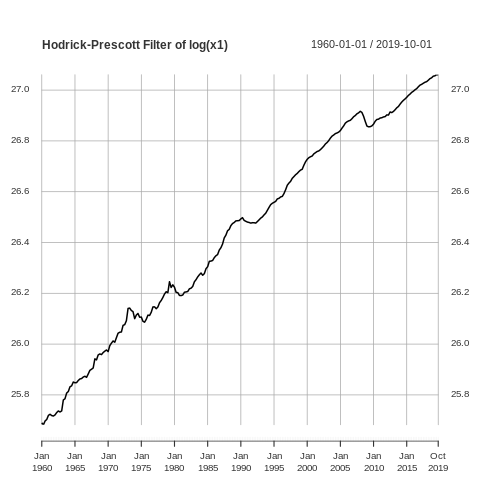

In [ ]:
%%R
plot(out[,"x"], t= "n", main = paste(hpf1$title, "of", hpf1$xname))

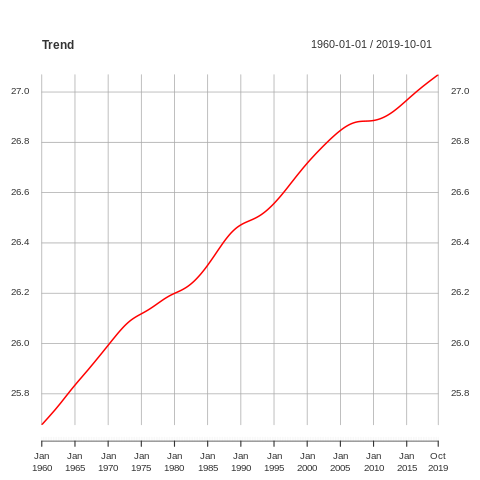

In [ ]:
%%R
plot(out[,"trend"], t = "n", main = "Trend", col = "red")

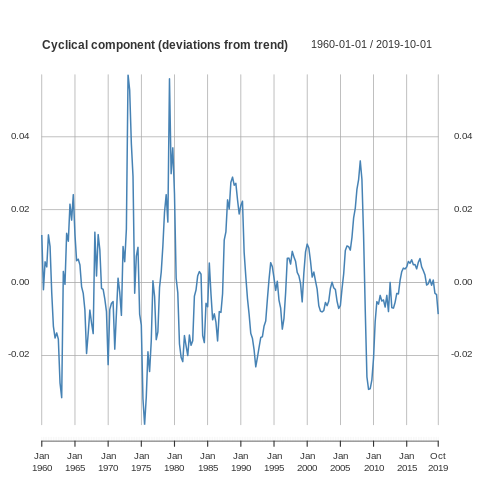

In [ ]:
%%R
plot(out[,"cycle"], t = "n", main = "Cyclical component (deviations from trend)", col = "steelblue")



In [ ]:
%%R
library(remotes)
install_github("cran/dplyr")
library(dplyr)

print(mean(df$cycle, na.rm = TRUE))
print(sd(df$cycle, na.rm = TRUE))